Data Cleaning

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Tea_Export_Master_2008_2024.xlsx to Tea_Export_Master_2008_2024.xlsx


In [2]:
import pandas as pd

df = pd.read_excel("Tea_Export_Master_2008_2024.xlsx")
df.head()

,Year,Month,Export Quantity (kg),Export Price (LKR/kg),Exchange Rate (LKR/USD),Export Price (USD/kg)
0,2008,January,25100000,385.12,108.166957,3.560422
1,2008,February,23850000,398.40,107.845238,3.694183
2,2008,March,27200000,412.55,107.731905,3.829413
3,2008,April,21400000,425.30,107.803182,3.945153
4,2008,May,28500000,438.10,107.787273,4.064487


In [3]:
df.shape, df.columns

((204, 6),
 Index(['Year', 'Month', 'Export Quantity (kg)', 'Export Price (LKR/kg)',
        'Exchange Rate (LKR/USD)', 'Export Price (USD/kg)'],
       dtype='object'))

In [4]:
df.isna().sum()

,0
Year,0
Month,0
Export Quantity (kg),3
Export Price (LKR/kg),3
Exchange Rate (LKR/USD),9
Export Price (USD/kg),9


In [5]:
df_clean = df.dropna().copy()

In [6]:
df_clean.isna().sum()

,0
Year,0
Month,0
Export Quantity (kg),0
Export Price (LKR/kg),0
Exchange Rate (LKR/USD),0
Export Price (USD/kg),0


In [7]:
len(df), len(df_clean)

(204, 193)

In [8]:
df_clean['Month_num'] = pd.to_datetime(
    df_clean['Month'], format='%B'
).dt.month

In [9]:
df_clean['Date'] = pd.to_datetime(
    df_clean['Year'].astype(str) + '-' + df_clean['Month_num'].astype(str),
    format='%Y-%m'
)

In [10]:
df_clean = df_clean.sort_values('Date').reset_index(drop=True)
df_clean[['Date']].head()

,Date
0,2008-01-01
1,2008-02-01
2,2008-03-01
3,2008-04-01
4,2008-05-01


In [11]:
expected = pd.date_range(
    start=df_clean['Date'].min(),
    end=df_clean['Date'].max(),
    freq='MS'
)

missing_months = expected.difference(df_clean['Date'])
missing_months

DatetimeIndex(['2012-03-01', '2012-04-01', '2012-05-01', '2012-06-01',
               '2012-07-01', '2012-08-01', '2012-09-01', '2012-12-01',
               '2013-02-01', '2013-03-01', '2013-05-01'],
              dtype='datetime64[ns]', freq=None)

In [12]:
df_clean.duplicated(subset=['Date']).sum()

np.int64(0)

In [13]:
df_clean['Export Price (USD/kg)'].describe()

,Export Price (USD/kg)
count,193.000000
mean,4.580146
std,0.493726
min,3.233524
25%,4.290756
50%,4.514578
75%,4.864465
max,5.757773


In [14]:
df_clean.to_excel("Tea_Export_Clean_Final_2008_2024.xlsx", index=False)
from google.colab import files
files.download("Tea_Export_Clean_Final_2008_2024.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [15]:
df_final = df_clean[
    [
        'Date',
        'Export Quantity (kg)',
        'Export Price (LKR/kg)',
        'Exchange Rate (LKR/USD)',
        'Export Price (USD/kg)'
    ]
].copy()

In [16]:
df_final['Date'] = df_final['Date'].dt.to_period('M').dt.to_timestamp()

In [17]:
df_final.head()
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Date                     193 non-null    datetime64[ns]
 1   Export Quantity (kg)     193 non-null    object        
 2   Export Price (LKR/kg)    193 non-null    float64       
 3   Exchange Rate (LKR/USD)  193 non-null    float64       
 4   Export Price (USD/kg)    193 non-null    float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 7.7+ KB


In [18]:
df_final.to_excel(
    "Tea_Export_Clean_Final_2008_2024.xlsx",
    index=False
)

from google.colab import files
files.download("Tea_Export_Clean_Final_2008_2024.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Exploratory Analysis

In [19]:
import pandas as pd

df = pd.read_excel("Tea_Export_Clean_Final_2008_2024.xlsx")
df.head()

,Date,Export Quantity (kg),Export Price (LKR/kg),Exchange Rate (LKR/USD),Export Price (USD/kg)
0,2008-01-01,25100000,385.12,108.166957,3.560422
1,2008-02-01,23850000,398.40,107.845238,3.694183
2,2008-03-01,27200000,412.55,107.731905,3.829413
3,2008-04-01,21400000,425.30,107.803182,3.945153
4,2008-05-01,28500000,438.10,107.787273,4.064487


In [20]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')
df.head()

,Export Quantity (kg),Export Price (LKR/kg),Exchange Rate (LKR/USD),Export Price (USD/kg)
Date,,,,
2008-01-01,25100000,385.12,108.166957,3.560422
2008-02-01,23850000,398.40,107.845238,3.694183
2008-03-01,27200000,412.55,107.731905,3.829413
2008-04-01,21400000,425.30,107.803182,3.945153
2008-05-01,28500000,438.10,107.787273,4.064487


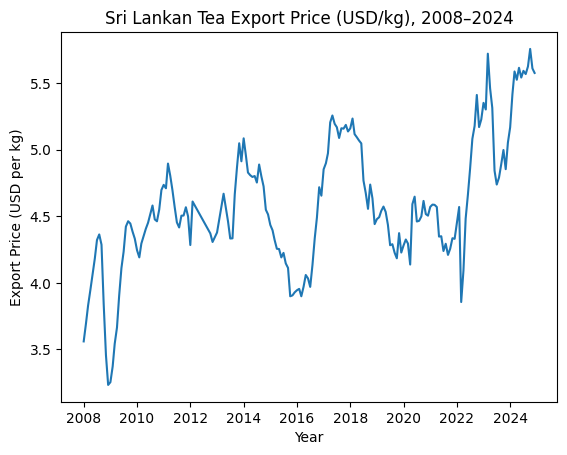

In [21]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(df.index, df['Export Price (USD/kg)'])
plt.xlabel("Year")
plt.ylabel("Export Price (USD per kg)")
plt.title("Sri Lankan Tea Export Price (USD/kg), 2008–2024")
plt.show()

In [22]:
df['Export Price (USD/kg)'].describe()

,Export Price (USD/kg)
count,193.000000
mean,4.580146
std,0.493726
min,3.233524
25%,4.290756
50%,4.514578
75%,4.864465
max,5.757773


Create and Inspect Log Returns

In [23]:
import numpy as np

df['Log_Return'] = np.log(df['Export Price (USD/kg)']).diff()
df[['Log_Return']].head()

,Log_Return
Date,
2008-01-01,NaN
2008-02-01,0.036880
2008-03-01,0.035952
2008-04-01,0.029776
2008-05-01,0.029800


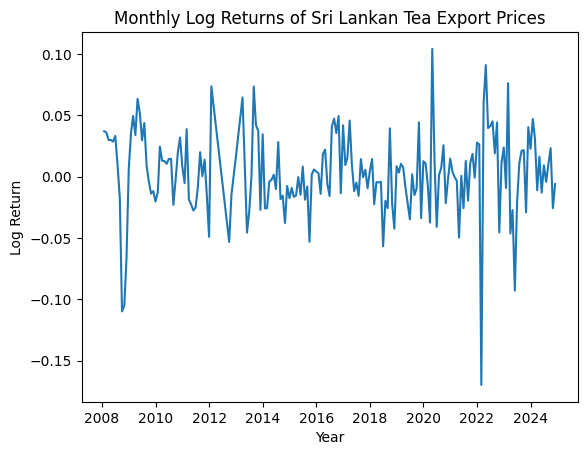

In [24]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(df.index, df['Log_Return'])
plt.xlabel("Year")
plt.ylabel("Log Return")
plt.title("Monthly Log Returns of Sri Lankan Tea Export Prices")
plt.show()